In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt

In [45]:
# Define the specified ranges for the histograms
ranges = [
    (1e-3, 1e-2),
    (1e-2, 1e-1),
    (1e-1, 1),
    (1, 10),
    (10, 100)
]

colors = {
    'SSDH': '#595959',
    'SSVP': '#006BA4',
    'SADH': '#C85200',
    'Sophia': '#ABABAB',
    'Adam': '#5F9ED1',
    'SGDM': '#FF800E'
}

rank_color = {
    'Best': '#FF800E',
    'Median': '#5F9ED1',
    'Worst': '#898989'
}

plt.rcParams['font.size'] = 17  # Default font size for all text
plt.rcParams['axes.titlesize'] = 20  # Font size for subplot titles
plt.rcParams['axes.labelsize'] = 18  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 16  # Font size for legends
plt.rcParams['lines.linewidth'] = 2

linewidth = 0.5
linecolor = 'black'
arrowstyle = '-'
x_right_increment = 1


RR_29csv = pd.read_csv('results/train_RR_final/train_RR_cond29_16samples_3000epochs.csv')
RR_15099csv = pd.read_csv('results/train_RR_final/train_RR_cond15099_16samples_3000epochs.csv')


In [50]:
# Sort the data by 'training_loss'
sorted_RR_15099csv= RR_15099csv.sort_values(by='training_loss')

# Group by 'config/optimiser_name' and display the sorted list for each optimizer
grouped_sorted_data = sorted_RR_15099csv.groupby('config/optimiser_name')
grouped_data_display = {optimizer: group for optimizer, group in grouped_sorted_data}


In [51]:
sorted_data = grouped_data_display['ssdh']
selected_entries = sorted_data.iloc[[0, 7, 15]]
selected_entries


,training_loss,hessian_spectral_norm,diag_hessian_norm,gradient_norm,minimum_abs_eigenval,eignvals_msqrt,positive_eigenval_pct,positive_exact_hess_diag_pct,clips_pct,hutchinson_diag_hessian_norm,...,config/best_config/net_path,config/best_config/lr,config/best_config/rho,config/best_config/update_period,config/best_config/beta2,config/best_config/n_epochs,config/best_config/weight_decay,logdir,hvp_estimate_norm,exp_avg_sq_norm
1,0.000916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/home/remote/u7529050/saddle-free-opt/net_RR_c...,0.282865,0.29129,10,0.9999,3000,0.0,9cd30_00001,NaN,NaN
13,0.001102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/home/remote/u7529050/saddle-free-opt/net_RR_c...,0.282865,0.29129,10,0.9999,3000,0.0,9cd30_00013,NaN,NaN
49,0.185817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/home/remote/u7529050/saddle-free-opt/net_RR_c...,0.282865,0.29129,10,0.9999,3000,0.0,9cd30_00049,NaN,NaN


In [52]:
sorted_RR_29csv= RR_29csv.sort_values(by='training_loss')

# Group by 'config/optimiser_name' and display the sorted list for each optimizer
grouped_sorted_data = sorted_RR_29csv.groupby('config/optimiser_name')
grouped_data_display = {optimizer: group for optimizer, group in grouped_sorted_data}

In [53]:
sorted_data = grouped_data_display['ssvp']
selected_entries = sorted_data.iloc[[0, 7, 15]]
selected_entries

,training_loss,hessian_spectral_norm,diag_hessian_norm,gradient_norm,minimum_abs_eigenval,eignvals_msqrt,positive_eigenval_pct,positive_exact_hess_diag_pct,exp_avg_sq_norm,timestamp,...,config/best_config/update_period,config/best_config/beta2,config/best_config/n_epochs,config/best_config/weight_decay,logdir,clips_pct,hutchinson_diag_hessian_norm,positive_hutchinson_diag_hess_pct,hessian_term_norm,hvp_estimate_norm
11,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716266978,...,10,0.99392,3000,0.0,90c09_00011,NaN,NaN,NaN,NaN,NaN
29,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716266953,...,10,0.99392,3000,0.0,90c09_00029,NaN,NaN,NaN,NaN,NaN
41,0.000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716267030,...,10,0.99392,3000,0.0,90c09_00041,NaN,NaN,NaN,NaN,NaN


In [54]:
# load all data
RR_29_best_all = {
    'Adam': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00012_12_optimiser_name=adam_2024-05-21_13-31-10'
    ],
    'SGDM': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00086_86_optimiser_name=sgdm_2024-05-21_13-31-39'
    ],
    'Sophia': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00093_93_optimiser_name=sophia_2024-05-21_13-31-40'
    ],
    'SSDH': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00094_94_optimiser_name=ssdh_2024-05-21_13-31-40'
    ], 
    'SADH': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00037_37_optimiser_name=sadh_2024-05-21_13-31-10'
    ],
    'SSVP': [
        'results/train_RR_final/train_RR_cond29_16samples_3000epochs/train_RR_with_hessian_analysis_90c09_00011_11_optimiser_name=ssvp_2024-05-21_13-31-10'
    ]
}


RR_15099_best_all = {
    'SGDM': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00023_23_optimiser_name=sgdm_2024-05-21_10-46-52',
    ],
    'Adam': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00015_15_optimiser_name=adam_2024-05-21_10-46-52',
    ],
    'Sophia': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00084_84_optimiser_name=sophia_2024-05-21_10-47-21'
    ],
    'SSDH': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00001_1_optimiser_name=ssdh_2024-05-21_10-46-51',
    ],
    'SADH': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00028_28_optimiser_name=sadh_2024-05-21_10-46-52'
    ],
    'SSVP': [
        'results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00074_74_optimiser_name=ssvp_2024-05-21_10-47-20'
    ],
}

RR_15099_sophia = {
    'Best': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00084_84_optimiser_name=sophia_2024-05-21_10-47-21'],
    'Median': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00024_24_optimiser_name=sophia_2024-05-21_10-46-52'],
    'Worst': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00072_72_optimiser_name=sophia_2024-05-21_10-47-20'],
}

RR_15099_ssdh = {
    'Best': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00001_1_optimiser_name=ssdh_2024-05-21_10-46-51'],
    'Median': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00013_13_optimiser_name=ssdh_2024-05-21_10-46-52'],
    'Worst': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00049_49_optimiser_name=ssdh_2024-05-21_10-46-52'],
}


RR_15099_sadh = {
    'Best': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00028_28_optimiser_name=sadh_2024-05-21_10-46-52'],
    'Median': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00082_82_optimiser_name=sadh_2024-05-21_10-47-21'],
    'Worst': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00064_64_optimiser_name=sadh_2024-05-21_10-47-19']
}

RR_15099_ssvp = {
    'Best': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00074_74_optimiser_name=ssvp_2024-05-21_10-47-20'],
    'Median': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00068_68_optimiser_name=ssvp_2024-05-21_10-47-19'],
    'Worst': ['results/train_RR_final/train_RR_cond15099_16samples_3000epochs/train_RR_with_hessian_analysis_9cd30_00092_92_optimiser_name=ssvp_2024-05-21_10-47-22']
}


RR_variables = [
    ##### for all optimisers
    "training_loss",
    "hessian_spectral_norm",
    "diag_hessian_norm",
    "gradient_norm",
    "minimum_abs_eigenval",
    "eignvals_msqrt",
    "positive_eigenval_pct",
    "positive_exact_hess_diag_pct",
    ########
    ##### for Sophia, SSDH, SADH, SSVP
    "clips_pct", 
    ##############
    #### for Sophia, SSDH, SADH
    "hutchinson_diag_hessian_norm",
    "hessian_term_norm",
    'positive_hutchinson_diag_hess_pct',
    
    # for adam:
    'exp_avg_sq_norm',
    ##### for SSVP
    'hvp_estimate_norm',

]



In [55]:
class data_analysis_mean():
    def __init__(self, optimiser_name, file_path_list, variables):
        self.optimiser_name = optimiser_name
        self.collection = {}
        for file_path in file_path_list:
            for root, dirs, files in os.walk(file_path, topdown=False):
                for f in files:
                    if f.startswith('progress'):
                        df = pd.read_csv(os.path.join(root, f))
                        for var in variables:
                            if var in df.columns:
                                if var in self.collection:
                                    self.collection[var].append(df[var])
                                else:
                                    self.collection[var] = [df[var]]
        

    def get_series_df(self, variable_name):
        if variable_name in self.collection:
            if len(self.collection[variable_name]) == 1:
                series_df = self.collection[variable_name][0]
       
            else:
                df = pd.concat(self.collection[variable_name], axis=1)
                series_df = df.mean(axis=1)
            return series_df
        else:
            return None

In [56]:
RR_small_cond_dict = {}
RR_large_cond_dict = {}
for opt_name in RR_29_best_all.keys():
    RR_small_cond_dict[opt_name] = data_analysis_mean(opt_name, RR_29_best_all[opt_name], RR_variables)
    RR_large_cond_dict[opt_name] = data_analysis_mean(opt_name, RR_15099_best_all[opt_name], RR_variables)

RR_sophia_large_cond_dict = {}
RR_ssdh_large_cond_dict = {}
RR_sadh_large_cond_dict = {}
RR_ssvp_large_cond_dict = {}

for rank in ['Best', 'Median', "Worst"]:
    RR_ssdh_large_cond_dict[rank]=data_analysis_mean(rank, RR_15099_ssdh[rank], RR_variables)
    RR_sophia_large_cond_dict[rank] = data_analysis_mean(rank, RR_15099_sophia[rank], RR_variables)
    RR_ssvp_large_cond_dict[rank] = data_analysis_mean(rank, RR_15099_ssvp[rank], RR_variables)
    RR_sadh_large_cond_dict[rank] = data_analysis_mean(rank, RR_15099_sadh[rank], RR_variables)


In [203]:
##### Generate performance metrics
convergence_threshold_small = 1e-5
convergence_threshold_large = 1e-3

def convergce(loss, threshold = 0.001):
    l = pd.DataFrame([loss.diff().abs() < threshold], dtype=float).T
    lr = l.iloc[::-1]
    idx = lr[lr==0].first_valid_index()
    return idx

convergence_dict_RR_small = {}
convergence_dict_RR_large = {}
dataframe_index = ['Convergence_iter_pct', 'Convergence_loss', 'convergence_mean', 'convergence_std']

for opt_name in RR_small_cond_dict.keys():
    if opt_name in ['Adam', 'SGDM']:
        continue
    training_loss = RR_small_cond_dict[opt_name].get_series_df('training_loss')
    c_idx = convergce(training_loss, threshold=convergence_threshold_small)
    c_loss = training_loss[c_idx]
    c_mean = training_loss[c_idx:].mean()
    c_std = training_loss[c_idx:].std()
    convergence_dict_RR_small[opt_name] = [(c_idx+1)*100/len(training_loss), c_loss, c_mean, c_std]

for opt_name in RR_large_cond_dict.keys():
    if opt_name in ['Adam', 'SGDM']:
        continue
    training_loss = RR_large_cond_dict[opt_name].get_series_df('training_loss')
    c_idx = convergce(training_loss, threshold=convergence_threshold_large)
    c_loss = training_loss[c_idx]
    c_mean = training_loss[c_idx:].mean()
    c_std = training_loss[c_idx:].std()
    convergence_dict_RR_large[opt_name] = [(c_idx+1)*100/len(training_loss), c_loss, c_mean, c_std]


# metrics_df_small = pd.DataFrame(convergence_dict_RR_small, index=dataframe_index).T.style.format("{:.3e}")
# metrics_df_large = pd.DataFrame(convergence_dict_RR_large, index=dataframe_index).T.style.format("{:.3e}")
metrics_df_small = pd.DataFrame(convergence_dict_RR_small, index=dataframe_index).round(2)
metrics_df_large = pd.DataFrame(convergence_dict_RR_large, index=dataframe_index).round(2)

In [204]:
metrics_df_small

,Sophia,SSDH,SADH,SSVP
Convergence_iter_pct,25.28,1.12,4.21,5.22
Convergence_loss,0.00,0.00,0.00,0.00
convergence_mean,0.00,0.00,0.00,0.00
convergence_std,0.00,0.00,0.00,0.00


In [205]:
metrics_df_large

,Sophia,SSDH,SADH,SSVP
Convergence_iter_pct,43.92,75.45,31.39,22.83
Convergence_loss,0.00,0.00,0.00,0.00
convergence_mean,0.00,0.00,0.00,0.00
convergence_std,0.00,0.00,0.00,0.00


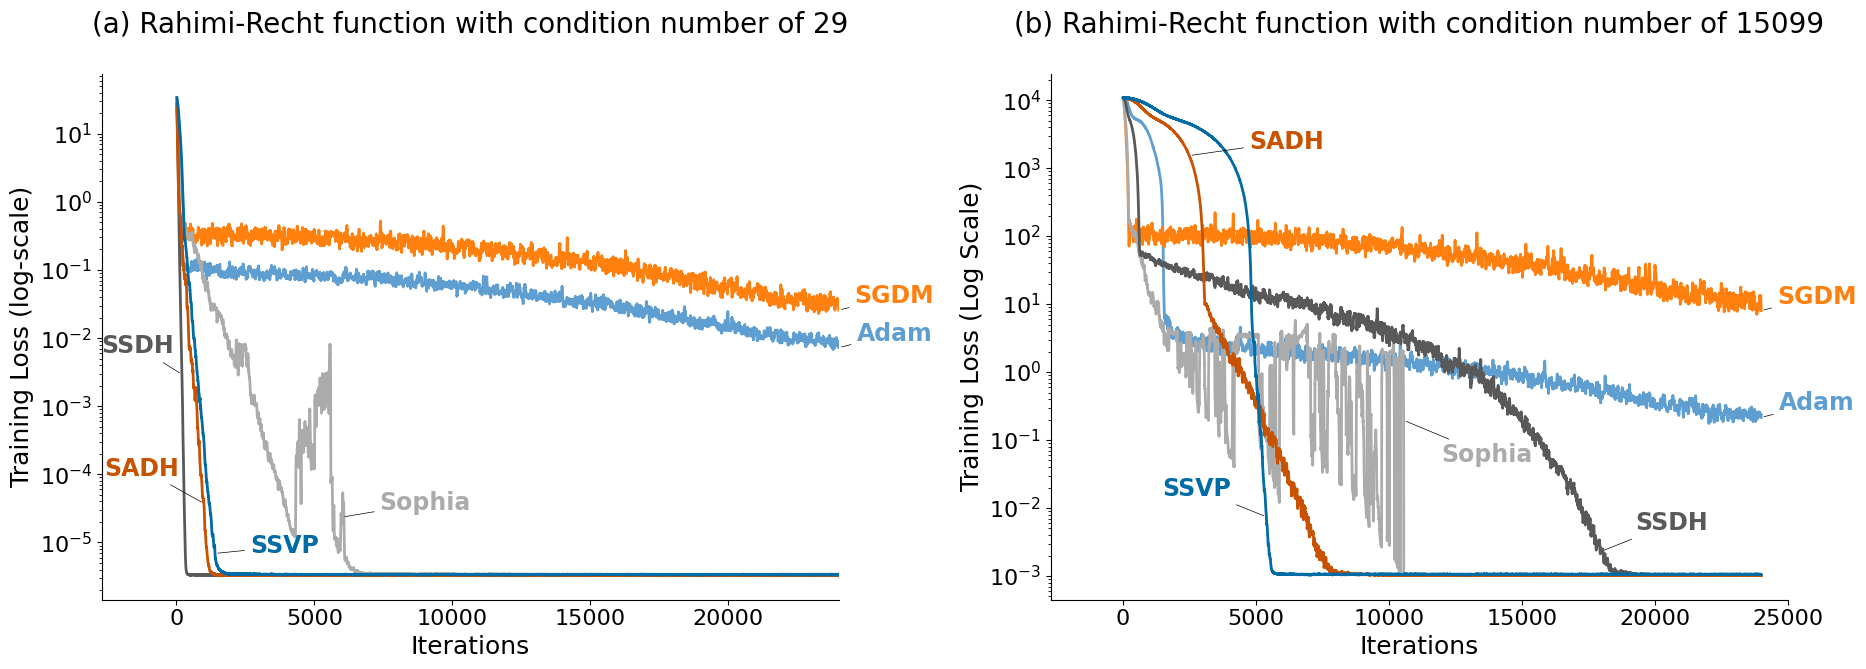

In [209]:
# Plot training Loss for optimiser in RR-29 and in RR-15099

fig, axs = plt.subplots(1, 2, figsize=(19, 7))
var_to_plot = 'training_loss'
for opt_name, data_dict in RR_small_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(20).mean()
    if training_loss is None:
        continue
    axs[0].semilogy(training_loss, label=colors[opt_name], c=colors[opt_name])

for opt_name, data_dict in RR_large_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(20).mean()
    if training_loss is None:
        continue
    axs[1].semilogy(training_loss, label=colors[opt_name], c=colors[opt_name])



axs[0].annotate('Adam', 
            xy=(list(range(len(RR_small_cond_dict['Adam'].get_series_df(var_to_plot).rolling(20).mean())))[-1]+1, list(RR_small_cond_dict['Adam'].get_series_df(var_to_plot).rolling(20).mean())[-1]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 
axs[0].annotate('SGDM', 
            xy=(list(range(len(RR_small_cond_dict['SGDM'].get_series_df(var_to_plot).rolling(20).mean())))[-1]+1, list(RR_small_cond_dict['SGDM'].get_series_df(var_to_plot).rolling(20).mean())[-1]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 


axs[0].annotate('Sophia', 
            xy=(list(range(len(RR_small_cond_dict['Sophia'].get_series_df(var_to_plot).rolling(20).mean())))[6000], list(RR_small_cond_dict['Sophia'].get_series_df(var_to_plot).rolling(20).mean())[6000]), 
            textcoords="offset points", 
            xytext=(60,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[0].annotate('SADH', 
            xy=(list(range(len(RR_small_cond_dict['SADH'].get_series_df(var_to_plot).rolling(20).mean())))[1000], list(RR_small_cond_dict['SADH'].get_series_df(var_to_plot).rolling(20).mean())[1000]), 
            textcoords="offset points", 
            xytext=(-45,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[0].annotate('SSDH', 
            xy=(list(range(len(RR_small_cond_dict['SSDH'].get_series_df(var_to_plot).rolling(20).mean())))[200], list(RR_small_cond_dict['SSDH'].get_series_df(var_to_plot).rolling(20).mean())[200]), 
            textcoords="offset points",
            xytext=(-32,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[0].annotate('SSVP', 
            xy=(list(range(len(RR_small_cond_dict['SSVP'].get_series_df(var_to_plot).rolling(20).mean())))[1400], list(RR_small_cond_dict['SSVP'].get_series_df(var_to_plot).rolling(20).mean())[1400]), 
            textcoords="offset points", 
            xytext=(50,0), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 




axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlabel('Iterations')


axs[0].set_ylabel('Training Loss (log-scale)')
axs[0].set_xlim(-2700, 24000)

axs[0].set_title('(a) Rahimi-Recht function with condition number of 29', pad=30)



axs[1].annotate('Adam', 
            xy=(list(range(len(RR_large_cond_dict['Adam'].get_series_df('training_loss').rolling(20).mean())))[-1]+1, list(RR_large_cond_dict['Adam'].get_series_df('training_loss').rolling(20).mean())[-1]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 
axs[1].annotate('SGDM', 
            xy=(list(range(len(RR_large_cond_dict['SGDM'].get_series_df('training_loss').rolling(20).mean())))[-1]+1, list(RR_large_cond_dict['SGDM'].get_series_df('training_loss').rolling(20).mean())[-1]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 


axs[1].annotate('Sophia', 
            xy=(list(range(len(RR_large_cond_dict['Sophia'].get_series_df('training_loss').rolling(20).mean())))[10558], list(RR_large_cond_dict['Sophia'].get_series_df('training_loss').rolling(20).mean())[10558]), 
            textcoords="offset points", 
            xytext=(60,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[1].annotate('SADH', 
            xy=(list(range(len(RR_large_cond_dict['SADH'].get_series_df('training_loss').rolling(20).mean())))[2500], list(RR_large_cond_dict['SADH'].get_series_df('training_loss').rolling(20).mean())[2500]), 
            textcoords="offset points", 
            xytext=(70,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[1].annotate('SSDH', 
            xy=(list(range(len(RR_large_cond_dict['SSDH'].get_series_df('training_loss').rolling(20).mean())))[18000], list(RR_large_cond_dict['SSDH'].get_series_df('training_loss').rolling(20).mean())[18000]), 
            textcoords="offset points", 
            xytext=(50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[1].annotate('SSVP', 
            xy=(list(range(len(RR_large_cond_dict['SSVP'].get_series_df('training_loss').rolling(20).mean())))[5400], list(RR_large_cond_dict['SSVP'].get_series_df('training_loss').rolling(20).mean())[5400]), 
            textcoords="offset points", 
            xytext=(-50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)


axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Training Loss (Log Scale)')
axs[1].set_xlim(-2700, 25000)

axs[1].set_title('(b) Rahimi-Recht function with condition number of 15099', pad=30)




plt.tight_layout()


plt.show()


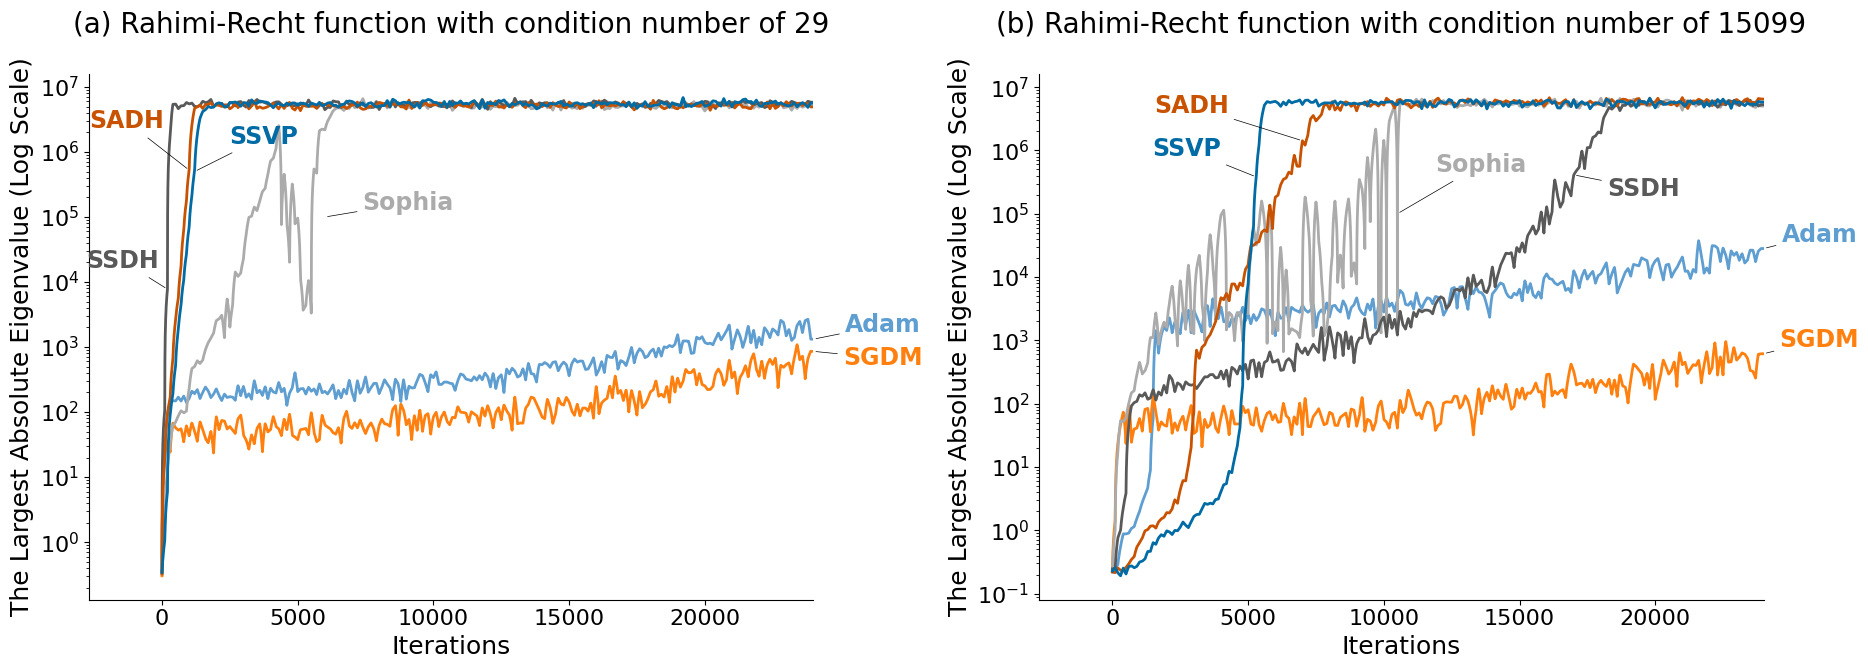

In [213]:
# plot the largest absolute eigenval in RR-29 and in RR-15099
fig, axs = plt.subplots(1, 2, figsize=(19, 7))
var_to_plot = 'hessian_spectral_norm'
for opt_name, data_dict in RR_small_cond_dict.items():
    series = data_dict.get_series_df(var_to_plot)
    if series is None:
        continue
    series = series.interpolate(method='linear')
    axs[0].semilogy(series, label=colors[opt_name], c=colors[opt_name])

for opt_name, data_dict in RR_large_cond_dict.items():
    series = data_dict.get_series_df(var_to_plot)
    if series is None:
        continue
    series = series.interpolate(method='linear')
    axs[1].semilogy(series, label=colors[opt_name], c=colors[opt_name])




axs[0].annotate('Adam', 
            xy=(list(range(len(RR_small_cond_dict['Adam'].get_series_df(var_to_plot).interpolate(method='linear'))))[-1]+1, list(RR_small_cond_dict['Adam'].get_series_df(var_to_plot).interpolate(method='linear'))[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 
axs[0].annotate('SGDM', 
            xy=(list(range(len(RR_small_cond_dict['SGDM'].get_series_df(var_to_plot).interpolate(method='linear'))))[-5]+1, list(RR_small_cond_dict['SGDM'].get_series_df(var_to_plot).interpolate(method='linear'))[-5]), 
            textcoords="offset points", 
            xytext=(50,-10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 


axs[0].annotate('Sophia', 
            xy=(list(range(len(RR_small_cond_dict['Sophia'].get_series_df(var_to_plot).interpolate(method='linear'))))[6000], 1e+5), 
            textcoords="offset points", 
            xytext=(60,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[0].annotate('SADH', 
            xy=(list(range(len(RR_small_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))))[1000], list(RR_small_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))[1000]), 
            textcoords="offset points", 
            xytext=(-45,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[0].annotate('SSVP', 
            xy=(list(range(len(RR_small_cond_dict['SSVP'].get_series_df(var_to_plot).interpolate(method='linear'))))[1200], list(RR_small_cond_dict['SSVP'].get_series_df(var_to_plot).interpolate(method='linear'))[1200]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 

axs[0].annotate('SSDH', 
            xy=(list(range(len(RR_small_cond_dict['SSDH'].get_series_df(var_to_plot).interpolate(method='linear'))))[200], list(RR_small_cond_dict['SSDH'].get_series_df(var_to_plot).interpolate(method='linear'))[200]), 
            textcoords="offset points", 
            xytext=(-32,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 




axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlim(-2700, 24000)

axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('The Largest Absolute Eigenvalue (Log Scale)')
axs[0].set_title('(a) Rahimi-Recht function with condition number of 29', pad=30)


axs[1].annotate('Adam', 
            xy=(list(range(len(RR_large_cond_dict['Adam'].get_series_df(var_to_plot).interpolate(method='linear'))))[-1]+1, list(RR_large_cond_dict['Adam'].get_series_df(var_to_plot).interpolate(method='linear'))[-1]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 
axs[1].annotate('SGDM', 
            xy=(list(range(len(RR_large_cond_dict['SGDM'].get_series_df(var_to_plot).interpolate(method='linear'))))[-3]+1, list(RR_large_cond_dict['SGDM'].get_series_df(var_to_plot).interpolate(method='linear'))[-3]), 
            textcoords="offset points", 
            xytext=(40,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[1].annotate('Sophia', 
            xy=(10500, 1e+5), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[1].annotate('SSVP', 
            xy=(list(range(len(RR_large_cond_dict['SSVP'].get_series_df(var_to_plot).interpolate(method='linear'))))[5300], list(RR_large_cond_dict['SSVP'].get_series_df(var_to_plot).interpolate(method='linear'))[5300]), 
            textcoords="offset points", 
            xytext=(-50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 

axs[1].annotate('SSDH', 
            xy=(list(range(len(RR_large_cond_dict['SSDH'].get_series_df(var_to_plot).interpolate(method='linear'))))[17000], list(RR_large_cond_dict['SSDH'].get_series_df(var_to_plot).interpolate(method='linear'))[17000]), 
            textcoords="offset points", 
            xytext=(50,-15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 


axs[1].annotate('SADH', 
            xy=(list(range(len(RR_large_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))))[7000], list(RR_large_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))[7000]), 
            textcoords="offset points", 
            xytext=(-80,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)


axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('The Largest Absolute Eigenvalue (Log Scale)')
axs[1].set_xlim(-2700, 24000)
axs[1].set_title('(b) Rahimi-Recht function with condition number of 15099', pad=30)




plt.tight_layout()


plt.show()




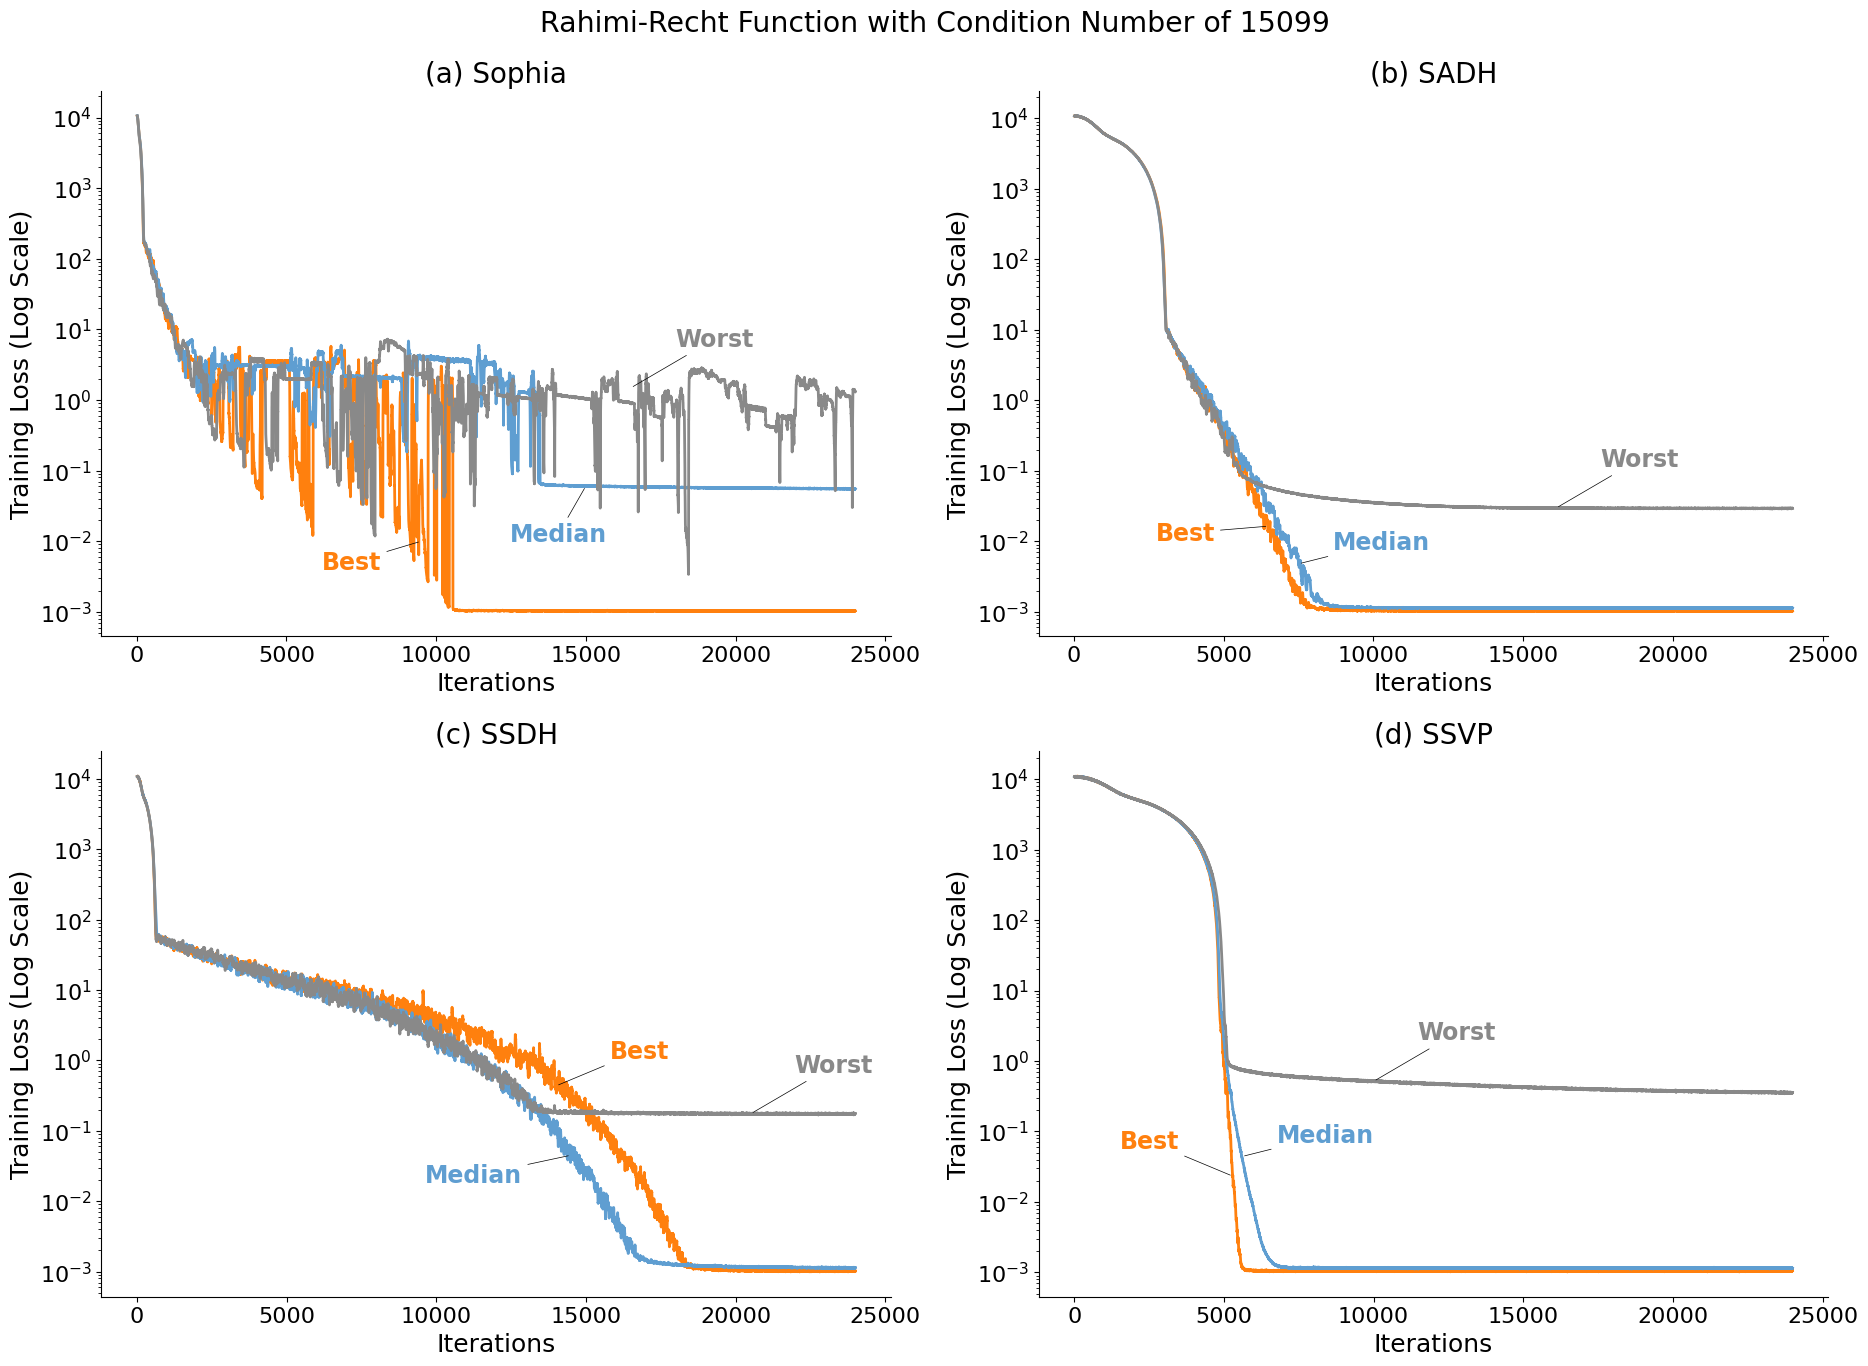

In [215]:
# plot the best, median and worst result on the RR condition number 0f 15099
fig, axs = plt.subplots(2, 2, figsize=(19, 14))
rank_color = {
    'Best': '#FF800E',
    'Median': '#5F9ED1',
    'Worst': '#898989'
}


var_to_plot = 'training_loss'
for rank, data_dict in RR_sophia_large_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(20).mean()
    # training_loss = data_dict.get_series_df(var_to_plot)
    if training_loss is None:
        continue
    axs[0][0].semilogy(training_loss, label=colors[opt_name], c=rank_color[rank])

for rank, data_dict in RR_sadh_large_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(20).mean()
    # training_loss = data_dict.get_series_df(var_to_plot)
    if training_loss is None:
        continue
    axs[0][1].semilogy(training_loss, label=colors[opt_name], c=rank_color[rank])



for rank, data_dict in RR_ssdh_large_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(10).mean()
    # training_loss = data_dict.get_series_df(var_to_plot)
    if training_loss is None:
        continue
    axs[1][0].semilogy(training_loss, label=colors[opt_name], c=rank_color[rank])

for rank, data_dict in RR_ssvp_large_cond_dict.items():
    training_loss = data_dict.get_series_df(var_to_plot).rolling(10).mean()
    # training_loss = data_dict.get_series_df(var_to_plot)
    if training_loss is None:
        continue
    axs[1][1].semilogy(training_loss, label=colors[opt_name],c=rank_color[rank])


##### sophia
axs[0][0].annotate('Best', 
            xy=(9500, 1e-2), 
            textcoords="offset points", 
            xytext=(-50,-20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Best']
            ) 


axs[0][0].annotate('Median', 
            xy=(list(range(len(RR_sophia_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())))[15000], list(RR_sophia_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())[15000]), 
            textcoords="offset points", 
            xytext=(-20,-40), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Median']
            ) 

axs[0][0].annotate('Worst', 
            xy=(list(range(len(RR_sophia_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())))[16000]+500, list(RR_sophia_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())[16000]), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Worst']
            ) 


axs[0][0].spines['top'].set_visible(False)
axs[0][0].spines['right'].set_visible(False)
axs[0][0].set_xlabel('Iterations')
axs[0][0].set_ylabel('Training Loss (Log Scale)')

axs[0][0].set_title('(a) Sophia', )



axs[0][1].annotate('Best', 
            xy=(list(range(len(RR_sadh_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())))[6500], list(RR_sadh_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())[6500]), 
            textcoords="offset points", 
            xytext=(-60,-10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Best']
            ) 


axs[0][1].annotate('Median', 
            xy=(list(range(len(RR_sadh_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())))[7500], list(RR_sadh_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())[7500]), 
            textcoords="offset points", 
            xytext=(60,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Median']
            ) 

axs[0][1].annotate('Worst', 
            xy=(list(range(len(RR_sadh_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())))[16000]+100, list(RR_sadh_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())[16000]), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Worst']
            ) 


axs[0][1].spines['top'].set_visible(False)
axs[0][1].spines['right'].set_visible(False)
axs[0][1].set_xlabel('Iterations')
axs[0][1].set_ylabel('Training Loss (Log Scale)')

axs[0][1].set_title('(b) SADH',)


axs[1][0].annotate('Best', 
            xy=(list(range(len(RR_ssdh_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())))[14000], list(RR_ssdh_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())[14000]), 
            textcoords="offset points", 
            xytext=(60,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Best']
            ) 

axs[1][0].annotate('Median', 
            xy=(list(range(len(RR_ssdh_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())))[14500], list(RR_ssdh_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())[14500]), 
            textcoords="offset points", 
            xytext=(-70,-20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Median']
            ) 

axs[1][0].annotate('Worst', 
            xy=(list(range(len(RR_ssdh_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())))[20000]+500, list(RR_ssdh_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())[20000]), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Worst']
            ) 
axs[1][0].spines['top'].set_visible(False)
axs[1][0].spines['right'].set_visible(False)
axs[1][0].set_xlabel('Iterations')
axs[1][0].set_ylabel('Training Loss (Log Scale)')

axs[1][0].set_title('(c) SSDH',)



axs[1][1].annotate('Best', 
            xy=(list(range(len(RR_ssvp_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())))[5300], list(RR_ssvp_large_cond_dict['Best'].get_series_df(var_to_plot).rolling(20).mean())[5300]), 
            textcoords="offset points", 
            xytext=(-60,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Best']
            ) 

axs[1][1].annotate('Median', 
            xy=(list(range(len(RR_ssvp_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())))[5600], list(RR_ssvp_large_cond_dict['Median'].get_series_df(var_to_plot).rolling(20).mean())[5600]), 
            textcoords="offset points", 
            xytext=(60,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Median']
            ) 

axs[1][1].annotate('Worst', 
            xy=(list(range(len(RR_ssvp_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())))[10000], list(RR_ssvp_large_cond_dict['Worst'].get_series_df(var_to_plot).rolling(20).mean())[10000]), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=rank_color['Worst']
            ) 
axs[1][1].spines['top'].set_visible(False)
axs[1][1].spines['right'].set_visible(False)
axs[1][1].set_xlabel('Iterations')
axs[1][1].set_ylabel('Training Loss (Log Scale)')

axs[1][1].set_title('(d) SSVP',)




fig.suptitle('Rahimi-Recht Function with Condition Number of 15099')

plt.tight_layout()
plt.show()

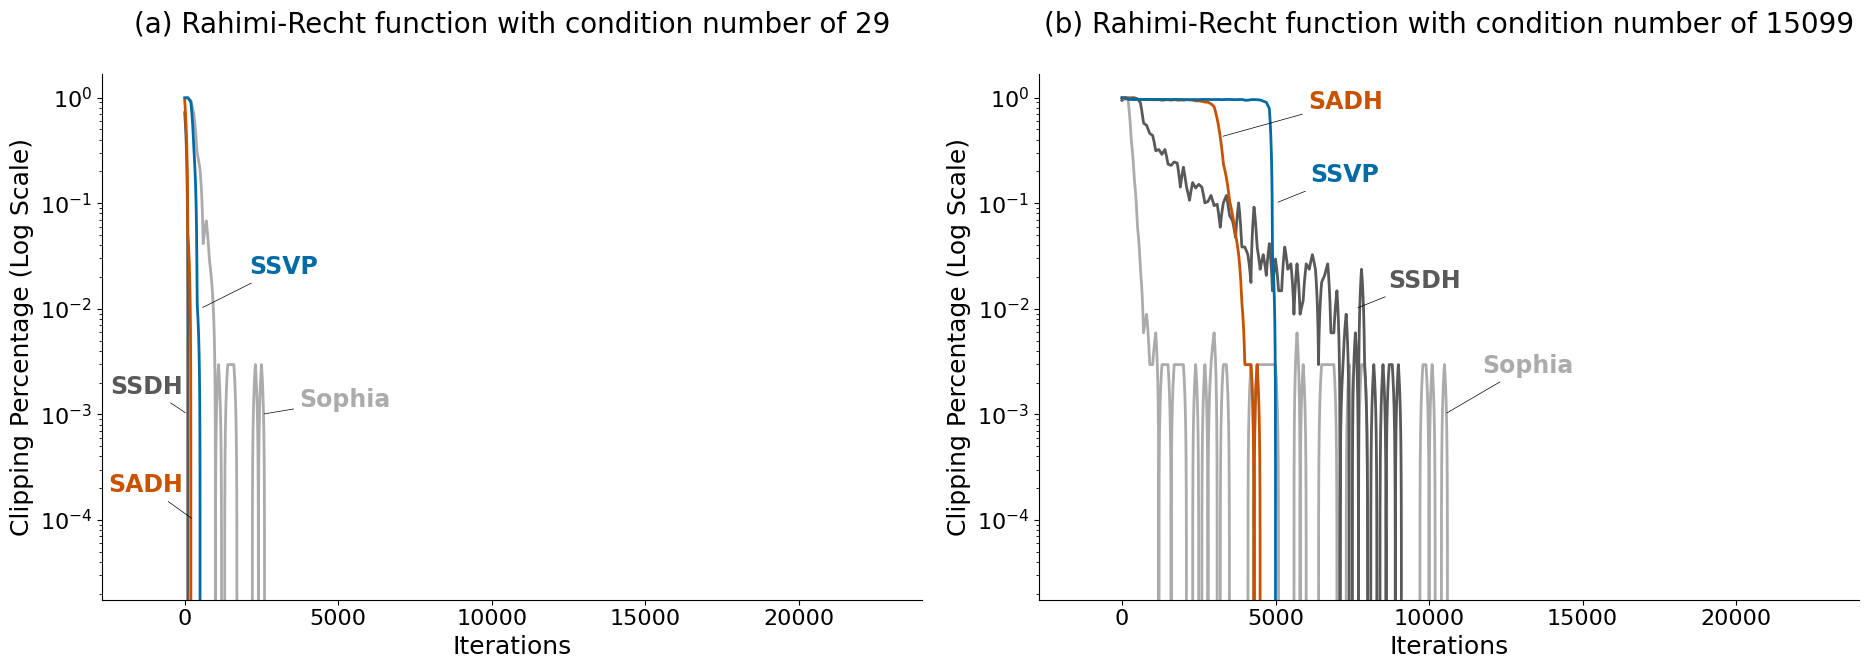

In [220]:
# plot the clipping percentage in RR-29 and in RR-15099
fig, axs = plt.subplots(1, 2, figsize=(19, 7))
var_to_plot = 'clips_pct'
for opt_name, data_dict in RR_small_cond_dict.items():
    series = data_dict.get_series_df(var_to_plot)
    if series is None:
        continue
    series = series.interpolate(method='linear')
    axs[0].semilogy(series, label=colors[opt_name], c=colors[opt_name])

for opt_name, data_dict in RR_large_cond_dict.items():
    series = data_dict.get_series_df(var_to_plot)
    if series is None:
        continue
    series = series.interpolate(method='linear')
    axs[1].semilogy(series, label=colors[opt_name], c=colors[opt_name])



axs[0].annotate('Sophia', 
            xy=(2500, 1e-3), 
            textcoords="offset points", 
            xytext=(60,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[0].annotate('SADH', 
            xy=(300, 1e-4), 
            textcoords="offset points", 
            xytext=(-35,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[0].annotate('SSVP', 
            xy=(500, 1e-2), 
            textcoords="offset points", 
            xytext=(60,25), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 

axs[0].annotate('SSDH', 
            xy=(100,1e-3), 
            textcoords="offset points", 
            xytext=(-30,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 




axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlim(-2700, 24000)

axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Clipping Percentage (Log Scale)')
axs[0].set_title('(a) Rahimi-Recht function with condition number of 29', pad=30)




axs[1].annotate('Sophia', 
            xy=(10500, 1e-3), 
            textcoords="offset points", 
            xytext=(60,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[1].annotate('SSVP', 
            xy=(5000, 1e-1), 
            textcoords="offset points", 
            xytext=(50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 

axs[1].annotate('SSDH', 
            xy=(7600, 1e-2), 
            textcoords="offset points", 
            xytext=(50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 


axs[1].annotate('SADH', 
            xy=(list(range(len(RR_large_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))))[3200], list(RR_large_cond_dict['SADH'].get_series_df(var_to_plot).interpolate(method='linear'))[3200]), 
            textcoords="offset points", 
            xytext=(90,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)


axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Clipping Percentage (Log Scale)')
axs[1].set_xlim(-2700, 24000)
axs[1].set_title('(b) Rahimi-Recht function with condition number of 15099', pad=30)




plt.tight_layout()


plt.show()



/var/folders/1h/w2qkgnq11gz8tks569639j9h0000gn/T/ipykernel_30012/3872224004.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  optimizer_counts.fillna(0, inplace=True)


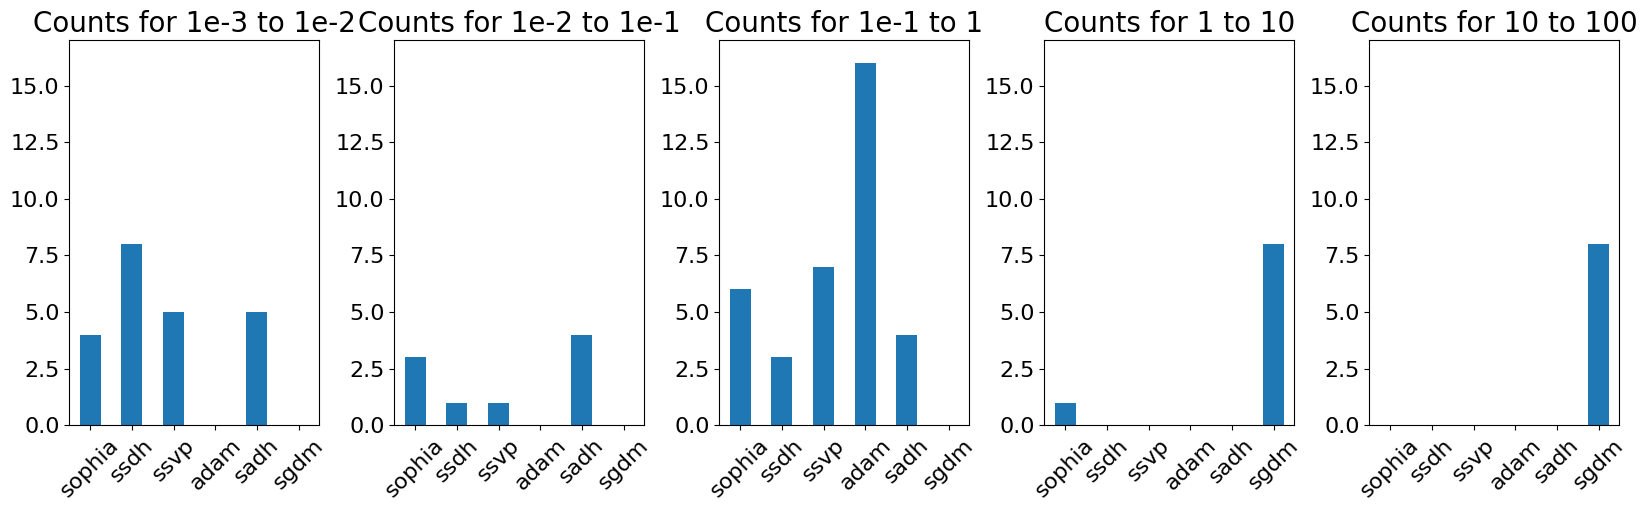

In [44]:
# Define bins and their labels
bins = [(1e-3, 1e-2), (1e-2, 1e-1), (1e-1, 1), (1, 10), (10, 100)]
bin_labels = ['1e-3 to 1e-2', '1e-2 to 1e-1', '1e-1 to 1', '1 to 10', '10 to 100']

# Prepare a DataFrame to store the counts for each optimizer in each range
optimizer_counts = pd.DataFrame(index=RR_15099csv['config/optimiser_name'].unique(), columns=bin_labels)

# Initialize the counts to zero
optimizer_counts.fillna(0, inplace=True)

# Calculate counts for each range and optimizer
for bin_label, (bin_low, bin_high) in zip(bin_labels, bins):
    # Filter the data within the bin range
    range_data = RR_15099csv[(RR_15099csv['training_loss'] > bin_low) & (RR_15099csv['training_loss'] <= bin_high)]
    # Count occurrences for each optimizer
    counts = range_data['config/optimiser_name'].value_counts()
    optimizer_counts.loc[counts.index, bin_label] = counts

# Plotting the counts
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

for ax, bin_label in zip(axes, bin_labels):
    optimizer_counts[bin_label].plot(kind='bar', ax=ax, title=f'Counts for {bin_label}', rot=45)
    ax.set_ylim(0, 17)

plt.show()


In [217]:
RR15099_training_loss_count = {
    '1e-4 to 1e-3': {},
    '1e-3 to 1e-2': {},
    '1e-2 to 1e-1': {},
    '1e-1 to 1': {},
    '1 to 10': {},
    '10 to 100': {},
}
RR_large_loss = RR_15099csv.groupby('config/optimiser_name')
RR_large_loss_group = {optimizer: group for optimizer, group in RR_large_loss}

for opt_name, sub_group in RR_large_loss_group.items():
    count0 = ((sub_group['training_loss'] >= 1e-4) & (sub_group['training_loss'] < 1e-3)).value_counts()
    RR15099_training_loss_count['1e-4 to 1e-3'][opt_name] = count0[True] if True in count0 else 0
    count1 = ((sub_group['training_loss'] >= 1e-3) & (sub_group['training_loss'] < 1e-2)).value_counts()
    if True not in count1:
        RR15099_training_loss_count['1e-3 to 1e-2'][opt_name] = 0
    else:
        RR15099_training_loss_count['1e-3 to 1e-2'][opt_name] = count1[True]

    count2 = ((sub_group['training_loss'] >= 1e-2) & (sub_group['training_loss'] < 1e-1)).value_counts()
    RR15099_training_loss_count['1e-2 to 1e-1'][opt_name] = count2[True] if True in count2 else 0
    
    count3 = ((sub_group['training_loss'] >= 1e-1) & (sub_group['training_loss'] < 1)).value_counts()
    RR15099_training_loss_count['1e-1 to 1'][opt_name] = count3[True] if True in count3 else 0

    count4 = ((sub_group['training_loss'] >= 1) & (sub_group['training_loss'] < 10)).value_counts()
    RR15099_training_loss_count['1 to 10'][opt_name] = count4[True] if True in count4 else 0

    count5 = ((sub_group['training_loss'] >= 10) & (sub_group['training_loss'] <100)).value_counts()
    RR15099_training_loss_count['10 to 100'][opt_name] = count5[True] if True in count5 else 0

In [219]:

pd.DataFrame(RR15099_training_loss_count)

,1e-4 to 1e-3,1e-3 to 1e-2,1e-2 to 1e-1,1e-1 to 1,1 to 10,10 to 100
adam,0,0,0,16,0,0
sadh,3,5,4,4,0,0
sgdm,0,0,0,0,8,8
sophia,2,4,3,6,1,0
ssdh,4,8,1,3,0,0
ssvp,3,5,1,7,0,0
